In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import numpy as np
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler
from will import detect

In [7]:
# Load and prepare your data
data_dir_scattered = "simulated_scattered_bursts"
data_dir_simple = "simulated_simple_bursts"

# Load the data from both directories into separate arrays
data_scattered = []
data_simple = []

for filename in os.listdir(data_dir_scattered):
    if filename.endswith(".npy"):
        data_scattered.append(np.load(os.path.join(data_dir_scattered, filename)))

for filename in os.listdir(data_dir_simple):
    if filename.endswith(".npy"):
        data_simple.append(np.load(os.path.join(data_dir_simple, filename)))

data_scattered = np.array(data_scattered).reshape(-1, 1024 * 512)[0:100]
data_simple = np.array(data_simple).reshape(-1, 1024 * 512)[0:100]

# Combine the two datasets into one
combined_data = np.concatenate((data_scattered, data_simple), axis=0)

# Reshape the combined data for PCA
combined_data_2d = combined_data.reshape(-1, 1024 * 512)

combined_data_2d.shape

(200, 524288)

In [10]:
# Apply FastICA to the combined data
n_components = 2  # Number of components to visualize
fast_ica = FastICA(n_components=n_components, random_state=0)
fit = fast_ica.fit_transform(combined_data_2d)

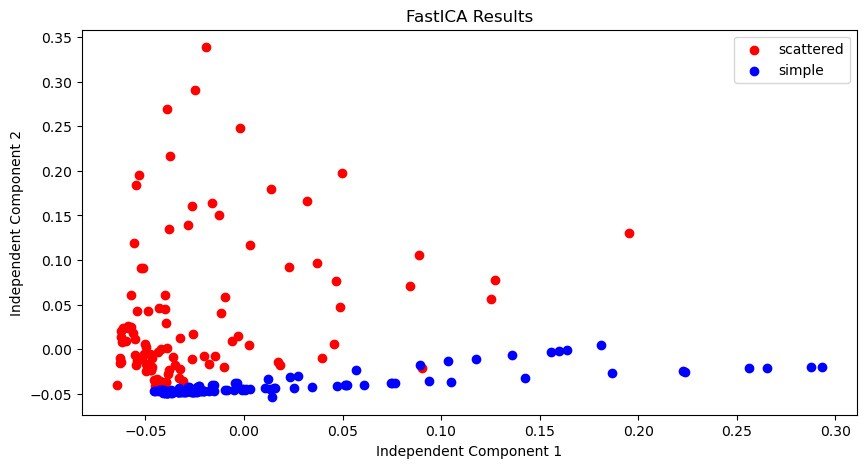

In [11]:
# Plot the FastICA results directly
plt.figure(figsize=(10, 5))
plt.scatter(fit[:100, 0], fit[:100, 1], c='r', label='scattered')
plt.scatter(fit[100:, 0], fit[100:, 1], c='b', label='simple')
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.title('FastICA Results')
plt.legend()
plt.show()